[![xtensor](Amego_banner.png)](https://asd.gsfc.nasa.gov/amego/)


You can find MEGAlib basic documentation here: http://megalibtoolkit.com/home.html

In [1]:
import os
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from ipywidgets import Layout, interactive

from gwidgets import SelectFilesButton
from gParsing import SimFileParser_general, SimFileParser_events, RevFileParser_events
from gParsing import DetectorIDdict

# Upload your .sim file 

Browse the simulated file (.sim file by cosima run):

In [2]:
browse_file = SelectFilesButton()
browse_file

SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle(button_color='gray'))

In [48]:
sim_file = browse_file.files[0]
sim_file

'/Users/mnegro/Documents/_AMEGO/_ComPair/_simulations/CosimaSim/HomogeneousBeam_mono30MeV_rndpol_evt1e5_newtrggOK.inc1.id1.sim'

## Access the simulation main infos

In [49]:
general_infos = SimFileParser_general(sim_file)
df_general = pd.DataFrame(general_infos)

Here is your dataframe:

In [50]:
df_general[['Version', 'Geometry','Date', 'MEGAlib']]

,Version,Geometry,Date,MEGAlib
0,101,ComPairBase.geo.setup,2020-05-20,3.00.00
1,,,22:27:44,
2,,,,
3,,,,
4,,,,
5,,,,
6,,,,
7,,,,


In [51]:
df_general[['Seed', 'SimulationStartAreaFarField','BeamType','SpectralType','TB','TE','TS']]

,Seed,SimulationStartAreaFarField,BeamType,SpectralType,TB,TE,TS
0,1590027695,0.0,HomogeneousBeam,Mono,0,9.85142e-05,98587
1,,,0,30000,,,
2,,,0,,,,
3,,,100,,,,
4,,,0,,,,
5,,,0,,,,
6,,,-1,,,,
7,,,0.4,,,,


## Plotting

### Load simulated events with pandas

In [52]:
sim_events, hit_info = SimFileParser_events(sim_file)
df_events = pd.DataFrame(sim_events).T

// ------------------------------- //
// Number of triggers found: 50000  //
// ------------------------------- //


// ------------------------------- //
// 1 MeV -> Number of triggers found: 21791  //
// ------------------------------- //

// ------------------------------- //
// 2 MeV -> Number of triggers found: 20390  //
// ------------------------------- //

// ------------------------------- //
// 5 MeV -> Number of triggers found: 22810  //
// ------------------------------- //

// ------------------------------- //
// 10 MeV -> Number of triggers found: 31804  //
// ------------------------------- //

// ------------------------------- //
// 30 MeV -> Number of triggers found: 50464  //
// ------------------------------- //

In [53]:
df_ia_params = pd.DataFrame(df_events['IA'])
#df_ia_params['IA'][0]

### Histograms

Select the variables to plot:

Specify number of bins for the histogram

In [54]:
param = widgets.SelectMultiple(
    options=['TI', 'ED', 'EC', 'NS'],
    value=['ED'],
    description='Param.: ',
    disabled=False,
    layout=Layout(width='40%')
)
param

SelectMultiple(description='Param.: ', index=(1,), layout=Layout(width='40%'), options=('TI', 'ED', 'EC', 'NS'…

In [55]:
nbins = widgets.IntText(
    value=100,
    description='# on bins',
    disabled=False,
    layout=Layout(width='40%')
)
nbins

IntText(value=100, description='# on bins', layout=Layout(width='40%'))

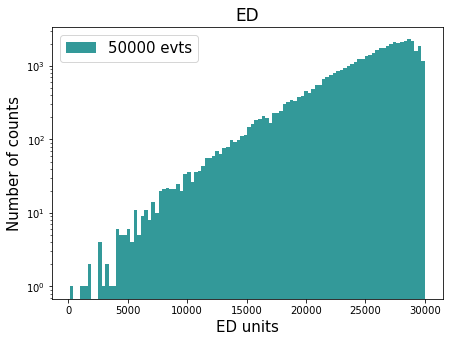

In [56]:
if len(param.value) > 1:
    fig, axs = plt.subplots(nrows=1, ncols=len(param.value), figsize=(21,4))
    for i, p in enumerate(param.value):
        axs[i].hist(np.array(df_events[p]), bins=nbins.value, color='teal', alpha=0.8,
                   label='%i evts'%len(df_events[p]))
        axs[i].set_title(p, size=17)
        axs[i].set_xlabel('%s units'%p, size=15)
        axs[i].set_ylabel('Number of counts', size=15)
        axs[i].set_yscale('log')
        axs[i].legend(fontsize=15)
    plt.show()
else:
    plt.figure(figsize=(7,5))
    plt.hist(np.array(df_events[param.value[0]]), bins=nbins.value, color='teal', alpha=0.8,
            label='%i evts'%len(df_events[param.value[0]]))
    plt.title(param.value[0], size=17)
    plt.xlabel('%s units'%param.value[0], size=15)
    plt.ylabel('Number of counts', size=15)
    plt.yscale('log')
    plt.legend(fontsize=15)
    plt.show()

### Energy deposit in subsystems

In [57]:
df_hit = pd.DataFrame(hit_info)
df_hit


,DetID,EnDep,HitX,HitY,HitZ
0,2,993.02311,-0.85000,-0.08162,-11.45000
1,2,0.00671,-0.85000,-0.05766,-11.45000
2,2,292.76171,0.85000,-0.02685,-11.45000
3,2,10975.85938,0.85000,0.54836,-11.45000
4,2,264.76916,-0.85000,2.67507,-11.45000
...,...,...,...,...,...
610872,7,2288.15939,-1.73542,0.92212,-7.86202
610873,7,1855.26066,-1.89061,0.52646,-7.61661
610874,7,103.69902,-2.61958,1.43583,-7.24964
610875,7,8.83258,-2.26394,1.66629,-7.06315


Select the subsystem(s) you want:

In [13]:
subsys = widgets.SelectMultiple(
    options=list(np.unique(df_hit['DetID'])),
    description='Param.: ',
    disabled=False,
    layout=Layout(width='30%', height='90%')
)
subsys

SelectMultiple(description='Param.: ', layout=Layout(height='90%', width='30%'), options=(1, 2, 7), value=())

In [14]:
nbins2 = widgets.IntText(
    value=100,
    description='# on bins',
    disabled=False,
    layout=Layout(width='40%')
)
nbins2

IntText(value=100, description='# on bins', layout=Layout(width='40%'))

In [46]:
#df_hit_sub = df_hit.loc[df_hit['DetID'] == 2]
#df_hit_sub

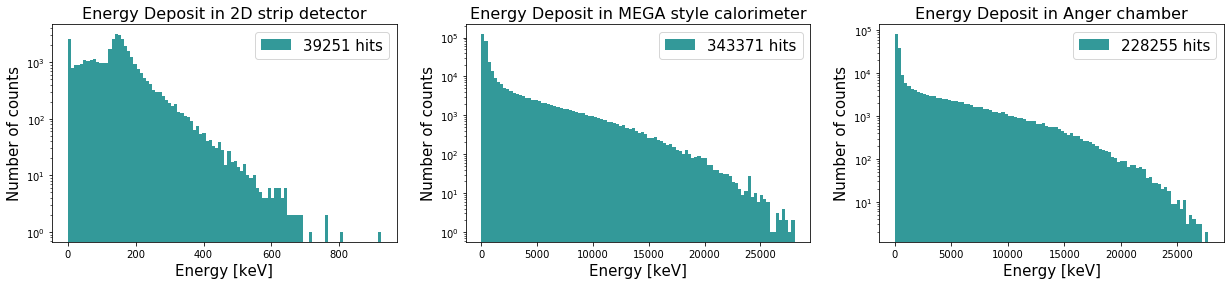

In [58]:
detIDdict = DetectorIDdict()
if len(subsys.value) > 1:
    fig, axs = plt.subplots(nrows=1, ncols=len(subsys.value), figsize=(21,4))
    for i, s in enumerate(subsys.value):
        df_hit_sub = df_hit.loc[df_hit['DetID'] == s]
        axs[i].hist(np.array(df_hit_sub['EnDep']), bins=nbins2.value, color='teal', alpha=0.8,
                    label='%i hits'%len(df_hit_sub))
        axs[i].set_title('Energy Deposit in %s'%detIDdict[str(s)], size=16)
        axs[i].set_xlabel('Energy [keV]', size=15)
        axs[i].set_ylabel('Number of counts', size=15)
        axs[i].set_yscale('log')
        axs[i].legend(fontsize=15)
    plt.show()
else:
    plt.figure(figsize=(7,5))
    df_hit_sub = df_hit.loc[df_hit['DetID'] == subsys.value[0]]
    plt.hist(np.array(df_hit_sub['EnDep']), bins=nbins2.value, color='teal', alpha=0.8,
            label='%i evts'%len(df_hit_sub))
    plt.title('Energy Deposit in subsystem %s'%detIDdict[str(subsys.value[0])], size=16)
    plt.xlabel('Energy [keV]', size=15)
    plt.ylabel('Number of counts', size=15)
    plt.yscale('log')
    plt.legend(fontsize=15)
    plt.show()

### Hit distribution along the axes in the MEGA style calorimeter

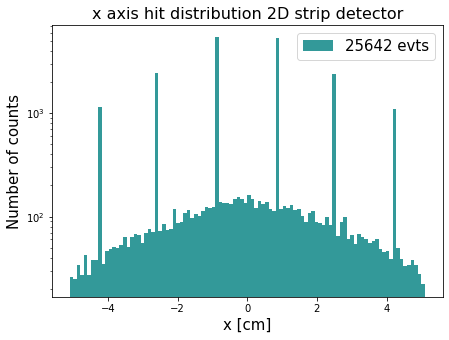

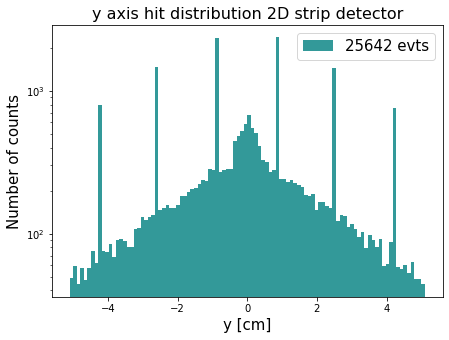

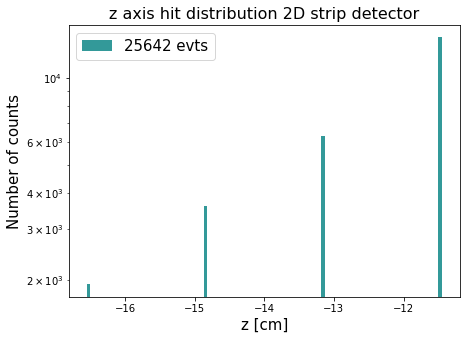

In [16]:
plt.figure(figsize=(7,5))
df_hit_sub = df_hit.loc[df_hit['DetID'] == 2]
plt.hist(np.array(df_hit_sub['HitX']), bins=nbins2.value, color='teal', alpha=0.8,
            label='%i evts'%len(df_hit_sub))
plt.title('x axis hit distribution %s'%detIDdict[str(subsys.value[0])], size=16)
plt.xlabel('x [cm]', size=15)
plt.ylabel('Number of counts', size=15)
plt.yscale('log')
plt.legend(fontsize=15)

plt.figure(figsize=(7,5))
df_hit_sub = df_hit.loc[df_hit['DetID'] == 2]
plt.hist(np.array(df_hit_sub['HitY']), bins=nbins2.value, color='teal', alpha=0.8,
            label='%i evts'%len(df_hit_sub))
plt.title('y axis hit distribution %s'%detIDdict[str(subsys.value[0])], size=16)
plt.xlabel('y [cm]', size=15)
plt.ylabel('Number of counts', size=15)
plt.yscale('log')
plt.legend(fontsize=15)

plt.figure(figsize=(7,5))
df_hit_sub = df_hit.loc[df_hit['DetID'] == 2]
plt.hist(np.array(df_hit_sub['HitZ']), bins=nbins2.value, color='teal', alpha=0.8,
            label='%i evts'%len(df_hit_sub))
plt.title('z axis hit distribution %s'%detIDdict[str(subsys.value[0])], size=16)
plt.xlabel('z [cm]', size=15)
plt.ylabel('Number of counts', size=15)
plt.yscale('log')
plt.legend(fontsize=15)

plt.show()

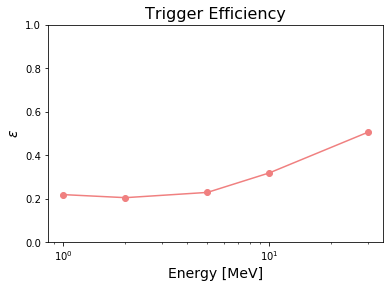

In [67]:
tot_sim_evt = 100000
trigg_evt = np.array([21791, 20390, 22810, 31804, 50464])
trigg_p100 = trigg_evt/tot_sim_evt
energy = np.array([1, 2, 5, 10, 30])

plt.figure()
plt.title('Trigger Efficiency', size=16)
plt.plot(energy, trigg_p100, 'o-', color='lightcoral')
plt.xscale('log')
plt.ylim(0, 1)
plt.xlabel('Energy [MeV]', size=14)
plt.ylabel('$\epsilon$', size=14)
plt.show()

# Upload your .tra file

In [72]:
PATH = '/Users/mnegro/Documents/_AMEGO/_ComPair/_simulations/CosimaSim'
tra_file_1MeV = os.path.join(PATH, 'HomogeneousBeam_mono1MeV_rndpol_evt1e5_newtrggOK.inc1.id1.tra')

In [73]:
df_1MeV = RevFileParser_events(tra_file_1MeV)

Trigger statistics:

  Not triggered events: ..................................   3384

  Number of vetoed events: ...............................      0

  Number of triggered events: ............................  18407

    Raised triggers (multiples possible)

      MainTriggerCZT: ....................................   1358

      MainTriggerCZT2: ...................................  13211

      MainTriggerCsI: ....................................    464

      MainTriggerSi: .....................................   4097





----------------------------------------------------------------------------



Event statistics for all triggered (!) events:

  Number of events .......................................  18407 (100.000%)

  Number of events, which passed event selections ........   2712 ( 14.734%)

  Reconstructable events .................................  18407 (100.000%)

       Single-site  ......................................    945 (  5.134%)

       Compton  ........

## Plotting

Given a dataframe ( df_ ), you can produce histograms of some of the parameters stored:
* df_['PE'] selects the reconstructed Photon Energy
* df_['SP'] selects the energy of the Scattered photon
* df_['RE'] selects the energy of the Recoiled Electron

So the distributions of df_['SP'] and df_['RE'] should be specular, while df_['PE'] should be peaked at the energy of the simulated monoenergetic beam (If a broad spectrum source is simulated this latter consideration is not valid).

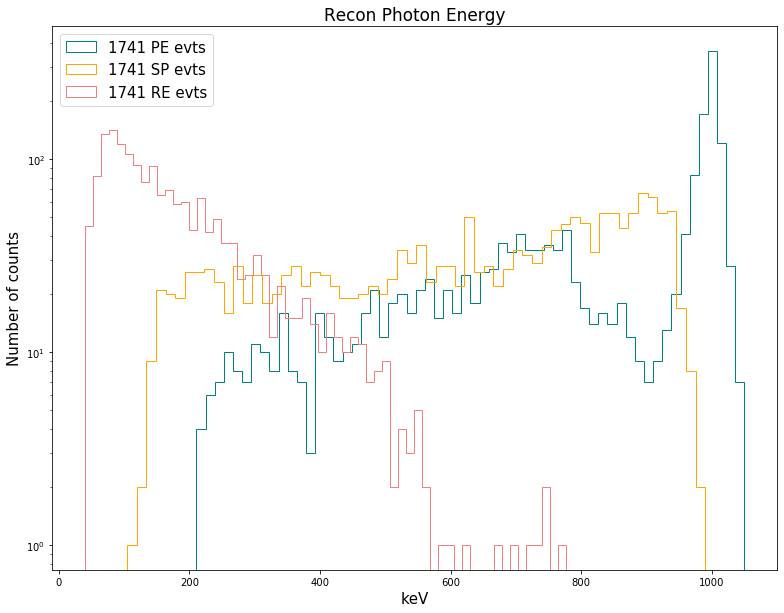

In [76]:
plt.figure(figsize=(13., 10), facecolor='white')
plt.hist(np.array(df_1MeV['PE']), bins=60, color='teal', alpha=1, histtype='step', 
            label='%i PE evts'%len(df_1MeV['PE']))
plt.hist(np.array(df_1MeV['SP']), bins=60, color='orange', alpha=1, histtype='step', 
            label='%i SP evts'%len(df_1MeV['SP']))
plt.hist(np.array(df_1MeV['RE']), bins=60, color='lightcoral', alpha=1, histtype='step',
            label='%i RE evts'%len(df_1MeV['RE']))
plt.title('Recon Photon Energy', size=17)
plt.xlabel('keV', size=15)
plt.ylabel('Number of counts', size=15)
plt.yscale('log')
plt.legend(fontsize=15, loc=2)
plt.show()